<a href="https://colab.research.google.com/github/lordfiftyfive/Seattle-Tensorflow/blob/master/InstructionalptI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you do NOT have the following libraries installed on your local machine then you will want to:
 1. install anaconda navigator and install the spyder enviroment withen anaconda navigator 
 2. open up a terminal withen anaconda navigator and use conda install (name of library)



 
 

In [0]:
!pip install quandl


  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=5acd675758d0c135d4489884d8a94d4c7e34029acdab1782fbdd9439267dbe8c
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import quandl
import pandas as pd

    First we are going to want to import our data here we are going to show how
     to import using one of the most common data format which is the csv file 

In [0]:
from google.colab import files
files.upload()

Saving 930-data-export.csv to 930-data-export (1).csv


{'930-data-export.csv': b'\xef\xbb\xbf"Region Code","Timestamp (Hour Ending)","Demand (MWh)","Demand Forecast (MWh)","Net Generation (MWh)","Total Interchange (MWh)"\nUS48,"1/13/2020 12 a.m. EST",412290,407010,392570,2977\nUS48,"1/13/2020 1 a.m. EST",396187,389484,384466,3557\nUS48,"1/13/2020 2 a.m. EST",383358,378106,373763,3755\nUS48,"1/13/2020 3 a.m. EST",376657,371685,368427,3617\nUS48,"1/13/2020 4 a.m. EST",373911,371433,365626,3968\nUS48,"1/13/2020 5 a.m. EST",377435,379238,372388,3885\nUS48,"1/13/2020 6 a.m. EST",391321,398288,390232,3724\nUS48,"1/13/2020 7 a.m. EST",420939,426194,419251,4251\nUS48,"1/13/2020 8 a.m. EST",451411,449840,445065,4899\nUS48,"1/13/2020 9 a.m. EST",466590,462151,458984,3777\nUS48,"1/13/2020 10 a.m. EST",474128,466698,463784,2587\nUS48,"1/13/2020 11 a.m. EST",476935,467473,465528,2413\nUS48,"1/13/2020 12 p.m. EST",473527,463802,464555,3258\nUS48,"1/13/2020 1 p.m. EST",469042,458334,459451,3658\nUS48,"1/13/2020 2 p.m. EST",463807,454026,454014,3540\nUS48

In [0]:
 electricity = pd.read_csv('930-data-export.csv')
 print(electricity)

    Region Code  ... Total Interchange (MWh)
0          US48  ...                  2977.0
1          US48  ...                  3557.0
2          US48  ...                  3755.0
3          US48  ...                  3617.0
4          US48  ...                  3968.0
..          ...  ...                     ...
188        US48  ...                     NaN
189        US48  ...                     NaN
190        US48  ...                     NaN
191        US48  ...                     NaN
192        US48  ...                     NaN

[193 rows x 6 columns]


https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48?src=email

In [0]:

Data_to_predict = quandl.get("FRBP/GDPPLUS_042619",  collapse="quarterly")
datafive = quandl.get("FRED/PCETRIM1M158SFRBDAL",  collapse="quarterly", start_date="1977-02-01",end_date="2016-03-31")#quandl.get("FRED/VALEXPUSM052N", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="quarterly", start_date="1960-09-30")#quandl.get("WWDI/USA_NE_GDI_TOTL_CD", authtoken="DNMZo2iRzVENxpxqHBKF", start_date="1970-12-31")
Data_To_predict = Data_to_predict.values
#the below column reduces the dimension of the data set by 1. We need to do this sometimes in order to put it into a pandas dataframe which we can easily manipulate

electricity= pd.DataFrame(electricity)
datafive= pd.DataFrame(datafive)

plt.plot(datafive)
print(datafive)
print(electricity)


LimitExceededError: ignored

[[0.64537445]
 [0.6222467 ]
 [0.47907489]
 [0.54515419]
 [0.61123348]
 [0.64537445]
 [0.71696035]
 [0.62665198]
 [0.66079295]
 [0.70484581]
 [0.86894273]
 [0.8314978 ]
 [0.97907489]
 [0.91519824]
 [1.        ]
 [0.83259912]
 [0.73348018]
 [0.58810573]
 [0.74669604]
 [0.48898678]
 [0.49779736]
 [0.54405286]
 [0.27643172]
 [0.26321586]
 [0.18832599]
 [0.30837004]
 [0.39757709]
 [0.20594714]
 [0.38325991]
 [0.31828194]
 [0.3777533 ]
 [0.35132159]
 [0.37885463]
 [0.39757709]
 [0.32709251]
 [0.36123348]
 [0.12555066]
 [0.37334802]
 [0.34911894]
 [0.2753304 ]
 [0.37555066]
 [0.29515419]
 [0.31277533]
 [0.14647577]
 [0.35462555]
 [0.43281938]
 [0.52312775]
 [0.33590308]
 [0.36784141]
 [0.28193833]
 [0.31497797]
 [0.3623348 ]
 [0.53744493]
 [0.46475771]
 [0.30396476]
 [0.30726872]
 [0.15198238]
 [0.17070485]
 [0.28634361]
 [0.34581498]
 [0.26651982]
 [0.17290749]
 [0.10022026]
 [0.20704846]
 [0.18502203]
 [0.12555066]
 [0.16079295]
 [0.17180617]
 [0.26101322]
 [0.21475771]
 [0.1277533 ]
 [0.12

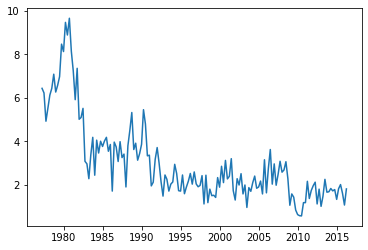

In [0]:
#Standardize the data

#note on minmaxScalar vs standard scalar using standard scalar is generally inadvisable because of the fact that standard scalar tries to force the data to conform to a standard normal distribution. if the data does not conform to a
#standard normal distribution this can end up distorting the data. 
Scalar = MinMaxScaler(feature_range=(0,1))

b = Scalar.fit_transform(datafive)

#b = np.log10(b)


plt.plot(datafive)
print(b)

In [0]:
#filling and eliminating missing data filling and eliminating missing data
#I think this one is about dropping the time index column from the data
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

final_data = imp.fit_transform(datafive)
#print(a)
#datasix = datasix.drop(datasix.index[0])
#Data_to_predict.values
#datasix = datasix.dropna()
#datafive = datafive.fillna(0)
#unfortunately dropna() and fillna(0) are not very good solutions what if there were a better way?
pca = PCA()# n_components=2 are the components in the dataset which we want to keep which have the greatest amount of correlation
final_data = pca.fit_transform(final_data)

#winsorization is for getting rid of outlier values in the data 
final_data = 	winsorize(final_data)


final_data = pd.DataFrame(final_data)

#this is basically selecting the first 224 values starting from the most initial value
final_data_sub = final_data[224::]

In [0]:
#what if we want to use two or more datasets in order to predict values in the third dataset? or we want to a dataset which says what category that dataset is in? we can use pd.concat for that 
from sklearn.model_selection import train_test_split

final_data= pd.concat([final_data,electricity],axis=1)# what this does is make sure that the datasets are connectet horizontally. so the other dataset basically becomes a second column in the new consolidated dataset. 

#if you want to do the splitting before putting it into a deep learning neural network then train_test_split is what is needed
#whatever your y= will go here 
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.33, random_state=42)
#.pca
#you HAVE to convert your pandas dataframes into arrays before you can feed it into any ml or deep learning neural network or algorithm
#higher order derivative(s) of values are easier for a machine learning algorithm to predict then the actual values
electricity = np.array(electricity)
#electricity = np.diff(electricity)
final_data = np.array(final_data)
final_data = np.diff(final_data)
electricity = np.squeeze(electricity,axis=1)

#generally you will only need to expand the number of dimensions of the dataset when you are working with RNNs or recurrent neural networks. 
electricity = np.expand_dims(electricity,axis=1)
#this is dummy y data
y = np.zeros(256)
y = np.array(y)

#again only something you are going to want to do if you are working with Recurrent neural networks
X[:, None] 


TypeError: ignored

In [5]:
#the above is generally not needed however because tensorflow allows you to split it during the fitting phase and once can simply manually slice
#the arrays 
#model.fit(X,Y,epochs=700, verbose=1,validation_split=0.2)

final_data = np.squeeze(final_data)
plt.plot(final_data)
#if enough time reamains go into various data visualization such as data decomposition, graphing and confidence intervals sns library. 

NameError: ignored

Part two starts from here 

In [2]:
!pip install tensorflow==2.0.0-beta1
#!pip install tensorflow==2.0.0rc0
#!pip install tensorflow-probability
#!pip install gaussian_processes
#!pip install quandl
#!pip install rpy2
#!pip install bootstrapped
!pip install hurst

     |████████████████████████████████| 87.9MB 62kB/s 
     |████████████████████████████████| 501kB 51.7MB/s 
     |████████████████████████████████| 3.1MB 41.9MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
import tensorflow as tf

#import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA, KernelPCA
#import sherpa

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Now we will do classifcation in the functional instead of sequential form. The functional form is considered more powerful because it among other things allows for more flexibility such as connecting layers at different levels to on another. 

Note: I use MSLE and ADagrad because those are the optimizers and losses which work best for me. However the standard "default optimizer and loss to use is MSE and ADAM respectively for regression and binary crossentropy for 2 category classifcation algorithms and categorical crossentropy as the default loss function for classification algorithms with more then two buckets

Take a look at the last layer of the neural network. One of the things which must be kept in mind is that the number of nodes in a neural netowork of the last layer MUST equal the number of buckets for our data. Also a sigmoid activation function is generally the standard activation function to use in the final layer of classifcation neural network

In [4]:
from sklearn.datasets import load_iris, fetch_california_housing

data = load_iris()
print(data)
print(data['target'])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

(20640, 8)
(20640,)
[[ 3.77687550e-01 -1.64446431e-01  3.33406202e-01 ... -3.76119361e-03
  -6.03179739e-04  2.08036107e-03]
 [ 3.16757787e-01  2.22548375e-01  3.02566145e-01 ... -5.51572134e-03
  -1.65845618e-03  4.36229044e-03]
 [ 4.09871621e-01 -3.82419974e-01  2.77266167e-01 ...  9.09329494e-03
  -8.05730847e-04 -5.69533618e-03]
 ...
 [ 3.77714090e-01  2.82229585e-01 -1.78309032e-01 ... -1.39043799e-02
  -4.57164294e-04  9.06260258e-05]
 [ 3.86895154e-01  2.64153572e-01 -1.64186327e-01 ... -1.25170303e-02
  -4.41388751e-04  9.67480249e-04]
 [ 3.69856553e-01  3.04781910e-01 -1.32269193e-01 ... -1.32333234e-02
  -4.90778420e-04  2.36978974e-03]]
(20640, 8)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 16512 samples, validate on 4128 samples
Epoch 1/100
16512/16512 [==============================] - 1s 77us/sample - loss: 2.3851 - val_loss: 1.5991
Epoch 2/100
16512/16512 [==============================] - 1s 65us/sample - loss: 

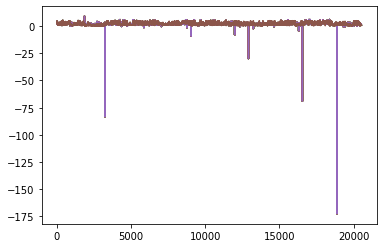

In [8]:
#DNN for regression

X_full, y_full = fetch_california_housing(return_X_y=True)
print(X_full.shape)
print(y_full.shape)
#X_full = X_full.reshape(-1,1)
#y_full = y_full.reshape(-1,1)
Scalar = MinMaxScaler(feature_range=(0,1))
X_full = Scalar.fit_transform(X_full)
#y_full = Scalar.fit_transform(y_full)

pca = PCA()# n_components=2 are the components in the dataset which we want to keep which have the greatest amount of correlation
#X_full = Scalar.fit_transform(X_full)
#y_full = Scalar.fit_transform(y_full)
X_full = pca.fit_transform(X_full)
#
print(X_full)
print(X_full.shape)
model = tf.keras.Sequential([
	tf.keras.Input(shape=(8,)),
  tf.keras.layers.Dense(25,kernel_initializer='ones', use_bias=False),
  #tf.keras.layers.InputLayer(input_shape=(10),dtype=x.dtype),#put a 1 before the 9 later
  tf.keras.layers.Dense(50,kernel_initializer='ones', use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(25,kernel_initializer='ones', use_bias=False)
])

model.compile(optimizer='Adam',
        loss='MSLE')
	
model.fit(X_full,y_full,epochs=100, verbose=1,validation_split=0.2)#, callbacks=[early_stop])

Prediction = model.predict(X_full[120::])
print(Prediction)
print(Prediction.shape)
u = 219
model.summary()

plt.plot(Prediction)
plt.plot(y_full[120::])

In [18]:
from sklearn.datasets import load_wine
import pandas as pd

from keras.utils import to_categorical
#x = data['data']
#print(x.shape)

#y = data['target']

#print(a)

#TODO: construct the output array manually by filling 3 arrays each with 50 0s 50 ones and 50 twos

X, y = load_wine(return_X_y=True)
X = Scalar.fit_transform(X)
X = pca.fit_transform(X)
#y = pd.DataFrame(y)
print(X)
print(y)
from keras.utils import to_categorical
y= to_categorical(y)
print(X.shape)
print(y.shape)
#stack y 
#print(y)
#print(y.shape)
inputs = tf.keras.Input(shape=(13,))#Input(shape=(1,3))#Debt_data_change_of_change 
first = tf.keras.layers.Dense(10, activation='relu')(inputs)
A = tf.keras.layers.Dense(400, activation='relu')(first)    
x = tf.keras.layers.Dense(800, activation='relu')(A)#remeber the prediction probably needs to be shifted back two before it can actually be compared to actual
x = tf.keras.layers.Dense(400,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='relu')(x)
 #
outputs = tf.keras.layers.Dense(3, activation='sigmoid')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop
#Use categorial crossentropy when doing Classification
#Use RMSprop as the optimizer in classification
model.compile(optimizer='RMSprop',
        loss=loss, metrics=['accuracy'])
	
model.fit(X,y,epochs=50, verbose=1,validation_split=0.2)#, callbacks=[early_stop])

Prediction = model.predict(X)
print(Prediction)

print(Prediction.shape)
u = 219
model.summary()

[[-0.70633576 -0.25319275  0.02409269 ...  0.04971144 -0.02001158
  -0.00872296]
 [-0.4849768  -0.00882289 -0.28048205 ...  0.07415784 -0.05083753
  -0.00524944]
 [-0.52117227 -0.18918722  0.19621674 ...  0.0121311  -0.10418449
  -0.02316441]
 ...
 [ 0.62631289 -0.54685701 -0.03049476 ...  0.13116697  0.11160576
   0.0389133 ]
 [ 0.5729911  -0.42551609 -0.09453672 ...  0.03027458  0.05732893
   0.01103053]
 [ 0.701764   -0.51350498  0.29390996 ... -0.02784028  0.01873501
  -0.06648261]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
(178, 3)
Train on 142 samples, validate on 36 samples
Epoch 1/50
142/142 [==============================] - 0s 3ms/sample - loss: 0.9559